In [1]:
import pandas as pd
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)

# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

Using TensorFlow backend.


`mnist` 손글씨 데이터를 load

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


데이터가 28x28의 모양으로 6만개가 있다. 이것을 784 1차원으로 reshape

In [4]:
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test = X_test.reshape(10000, 784).astype('float32') / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

## 훈련셋을 훈련셋과 검증셋으로 분리

In [5]:
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

## 훈련셋과 검증셋 고르기

In [6]:
train_random_idxs = np.random.choice(50000, 700)
val_rand_indx = np.random.choice(10000, 300)
X_train = X_train[train_random_idxs]
y_train = y_train[train_random_idxs]
X_val = X_val[val_rand_indx]
y_val = y_val[val_rand_indx]

## Model 설정

In [7]:
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(patience=20)
hist = model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_data=(X_val, y_val), callbacks=[early_stopping])

## 학습과정 시각화

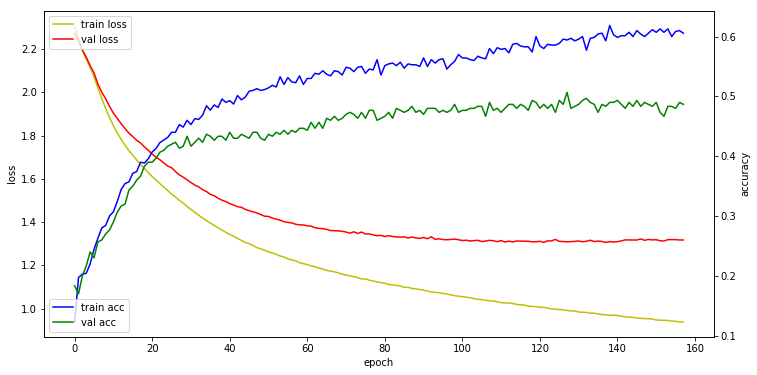

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
fig.set_size_inches(12,6)

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [10]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print('loss and metrics : ', loss_and_metrics)

10000/10000 [==============================] - 0s 19us/step
loss and metrics :  [1.3298098728179932, 0.48249999999999998]


## Tensorboard 연동 - 모델 학습 부터...

In [ ]:
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_grads=True, write_images=True)
hist = model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_data=(X_val, y_val), callbacks=[tb_hist])

## 학습과정 보기

```
$ tensorboard --logdir=./graph
```

## Model 저장

In [21]:
from keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')